# TEXT ANALYSIS 

This file is broken into the following parts: 

1. Text cleaning and pre-processing

2. Feature Extraction - Term Document Matrices (TDMs)

3. EDA 

4. Sentiment Analysis 

5. Filter Words (Experimental)


In [220]:
import numpy as np
import pandas as pd
import nltk
import re
from importlib import reload
import utils 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import  SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

## 1. TEXT CLEANING


In [273]:
# Read in Data

# converters used to handle hashtag dtypes
dunkin_raw = pd.read_csv("../Data_Collection/tweets_dunkin.csv",
    converters={"hashtags": lambda x: x.strip("[]").replace("'","").replace(",","")})

starbucks_raw = pd.read_csv("../Data_Collection/tweets_starbucks.csv",
    converters={"hashtags": lambda x: x.strip("[]").replace("'","").replace(",","")})

dunkin = dunkin_raw
starbucks = starbucks_raw

In [274]:
import utils
reload(utils)
# Clean Tweets 

# Uses clean_tweets() function defined in utils.py 
# apply our cleaning tweets function to entire text columns

# TWEET TEXT DATA
dunkin['text'] = dunkin['text'].apply(
    lambda x: utils.clean_tweets(x))

starbucks['text'] = starbucks['text'].apply(
    lambda x: utils.clean_tweets(x))


In [275]:
# sanity check
print(dunkin.text.head(10))
print(starbucks.text.head(10))

0    dunkin donut erwin tn mix frozen coffe ham bre...
1              dunkin realli thing w snackin bacon wtf
2                              dunkin gotta though lol
3                   dunkin mobil dunkin mobil commerci
4    newish place long pond next bryant stanton rig...
5    first thing get shift starbuck everi day go du...
6                                      undermin dunkin
7               work dunkin donut put azuki bean cheek
8    tariq say 5 fba women good enough top rang bla...
9    welcom environmentalist well known harm compan...
Name: text, dtype: object
0    starbuck put whole starbussi shaken espresso c...
1    dear ex bestfriend want thank u chang liter en...
2                    got half ice starbuck drink today
3                                          went trenta
4                                      wow thank think
5    tri hard destroy starbuck bathroom damn dragon...
6    woke compani long donat democrat caus amp supp...
7    sad sign time starbuck close 16 st

## 2. Feature Extraction - TDM

**Term Document Matrix (TDM)** is tracking the term frequency for each term by each document. 

**Document Term Matrix (DTM)** just assigns a binary value if a word is present in a given docuemnt. 

For each brand's DF, we create a DTM for 

* tweet text data

* hashtag data 

### Tweet Text Data

In [287]:
# ------
# DUNKIN
# ------

# instantiate count vectorizer
cv = CountVectorizer()
cv.fit(dunkin.text)

# encode document 
vector = cv.transform(dunkin.text)

# get feature names 
dunkin_feature_names = cv.get_feature_names_out()

# save results into its own DF
dunkin_TDM = pd.DataFrame(vector.toarray(), columns=dunkin_feature_names)

dunkin_TDM.head()

# save as CSV
# dunkin_TDM.to_csv("../Data/dunkin_TDM.csv")


,00,000,00am,00pm,01,02,02021,02339,02351,02914,...,zombi,zone,zoo,zookeep,zoom,zoomer,zoomi,zucchini,zumbach,zzzzziiiippppp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
# ------
# STARBUCKS
# ------

# instantiate count vectorizer
cv = CountVectorizer()
cv.fit(starbucks.text)

# encode document 
vector = cv.transform(starbucks.text)

# get feature names 
starbucks_feature_names = cv.get_feature_names_out()

# save results into its own DF
starbucks_TDM = pd.DataFrame(vector.toarray(), columns=starbucks_feature_names)

# save as CSV
# starbucks_TDM.to_csv("../Data/starbucks_TDM.csv")

### Hashtag Text Data

In [173]:
# ------
# DUNKIN
# ------

# instantiate count vectorizer
cv = CountVectorizer()
cv.fit(dunkin.hashtags)

# encode document 
vector = cv.transform(dunkin.hashtags)

# get feature names 
dunkin_feature_names = cv.get_feature_names_out()

# save results into its own DF
dunkin_hashtag_TDM = pd.DataFrame(vector.toarray(), columns=dunkin_feature_names)

# save as CSV
# dunkin_hashtag_TDM.to_csv("../Data/dunkin_hashtag_TDM.csv")

In [174]:
# ------
# STARBUCKS
# ------

# instantiate count vectorizer
cv = CountVectorizer()
cv.fit(starbucks.hashtags)

# encode document 
vector = cv.transform(starbucks.hashtags)

# get feature names 
starbucks_feature_names = cv.get_feature_names_out()

# save results into its own DF
starbucks_hashtag_TDM = pd.DataFrame(vector.toarray(), columns=starbucks_feature_names)

# save as CSV
# starbucks_hashtag_TDM.to_csv("../Data/starbucks_hashtag_TDM.csv")

## 3. EDA & Visualization



### Top Words

In [278]:
# Top N words 
N = 10

print("Top ",N," Dunkin Words\n","================")

# creates a DF to store total counts of words across ALL tweets
dunkin_sums = pd.DataFrame({'word_total': dunkin_TDM.sum(axis=0)})
dunkin_top10 = dunkin_sums['word_total'].nlargest(n=N)
print(dunkin_top10)

print("Top ",N," Starbucks Words\n","================")
starbucks_sums = pd.DataFrame({'word_total': starbucks_TDM.sum(axis=0)})
starbucks_top10 = starbucks_sums['word_total'].nlargest(n=N)
print(starbucks_top10)


Top  10  Dunkin Words
dunkin      8754
donut       3186
coffe       1438
like        1050
get          918
go           746
work         621
im           610
ice          592
starbuck     548
Name: word_total, dtype: int64
Top  10  Starbucks Words
starbuck    8637
drink       1257
get         1138
store       1124
coffe       1108
close        894
like         883
go           872
im           612
today        607
Name: word_total, dtype: int64


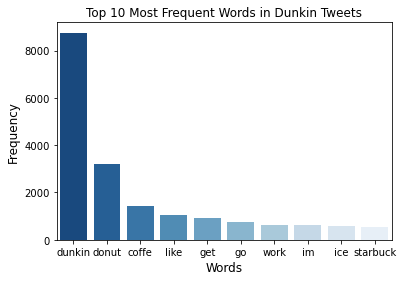

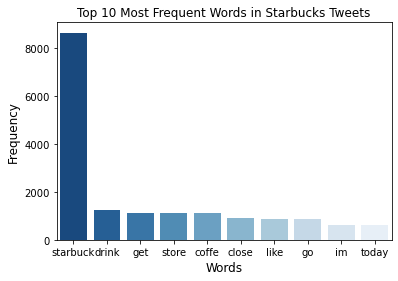

In [279]:
import warnings
warnings.filterwarnings("ignore")

# PLOT DUNKIN 
word = []
freq = []
for i,item in enumerate(dunkin_top10):
    freq.append(item)
    word.append(dunkin_top10.index[i])

sns.barplot(word, freq, palette="Blues_r")
plt.title("Top 10 Most Frequent Words in Dunkin Tweets")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.show()

# PLOT STARBUCKS 
word = []
freq = []
for i,item in enumerate(starbucks_top10):
    freq.append(item)
    word.append(starbucks_top10.index[i])

sns.barplot(word, freq, palette="Blues_r")
plt.title("Top 10 Most Frequent Words in Starbucks Tweets")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.show()



* One of Dunkin's top 10 words is 'starbucks' 

* Both have 'like' in the top 10 --> could help us find communities of people who like dunkin/starbucks 

* The word 'union' is a top 20 word in Starbucks which ~might~ be interesting. Maybe we can detect/examine a community of starbucks *employees* 

* After stemming the words, the top 20 order changed a little 


### Top Hashtags

In [280]:
# Top N hashtags 
N = 10

print("Top ",N," Dunkin Hashtags\n","================")

# creates a DF to store total counts of hashtags across ALL tweets
dunkin_hashtag_sums = pd.DataFrame({'hashtag_total': dunkin_hashtag_TDM.sum(axis=0)})
dunkin_top10_hashtags = dunkin_hashtag_sums['hashtag_total'].nlargest(n=N)
print(dunkin_top10_hashtags)

print("Top ",N," Starbucks Hashtags\n","================")
starbucks_hashtag_sums = pd.DataFrame({'hashtag_total': starbucks_hashtag_TDM.sum(axis=0)})
starbucks_hashtag_top10 = starbucks_hashtag_sums['hashtag_total'].nlargest(n=N)
print(starbucks_hashtag_top10)


Top  10  Dunkin Hashtags
dunkin          93
avocadotoast    27
giveaway        27
sb19            21
dunkindonuts    19
coffee          17
jobs            14
اصدقاء_دانكن    14
hiring          13
ad              12
Name: hashtag_total, dtype: int64
Top  10  Starbucks Hashtags
starbucks          258
retail             124
shopmycloset        32
poshmark            31
fashion             26
seattle             26
coffee              25
style               25
starbuckssummer     15
crime               12
Name: hashtag_total, dtype: int64



* We would potentially filter/remove tweets by hashtag (as suggested by monroe). Using hashtags like 'ad' 'giveaway' etc..

* Dunkin this time around has hashtags related to employment 'jobs' 'hiring'

* In Starbucks Top 20 - 'unionstrong' 'unionsforall' 

* Starbuck's Top are slightly more relevant past the Top 10 mark. Dunkin's Top hashtags beyond Top 10 get super random and weird


### Wordclouds

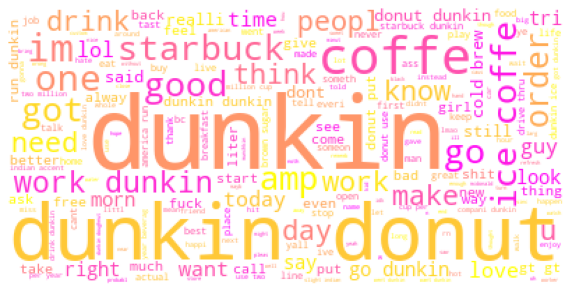

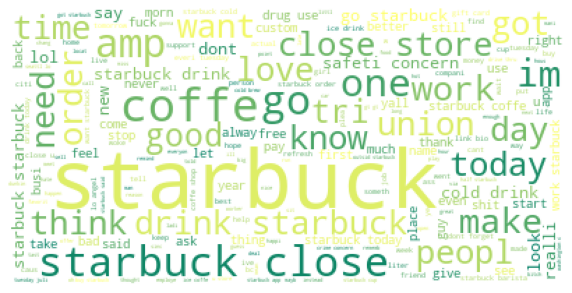

In [281]:
# join all tweet text into one text 
all_dunkin_tweets = [' '.join(dunkin['text'])]
all_dunkin_tweets = all_dunkin_tweets[0]

all_starbucks_tweets = [' '.join(starbucks['text'])]
all_starbucks_tweets = all_starbucks_tweets[0]

# generate word cloud image 
wordcloud = WordCloud(background_color='white', colormap = 'spring').generate(all_dunkin_tweets)

# PLOT DUNKIN
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# generate word cloud image 
wordcloud = WordCloud(background_color='white', colormap = 'summer').generate(all_starbucks_tweets)

# PLOT STARBUCKS
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 4. Sentiment Analysis


Sentiment Analysis usuing **VADER** (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It handles punctuation, booster words, signals, capitalizations, emoticons, emojis etc. so it should be run on un-clean data

link to VADER - https://github.com/cjhutto/vaderSentiment


In [230]:
# GET SENTIMENTS 

# instantiate analyzer object 
analyzer = SentimentIntensityAnalyzer()

# store sentiment dicts
dunkin_vsentiments = []
starbucks_vsentiments = []

# loop through all tweets and get vader sentiments
for tweet in list(dunkin_raw.text):
    vs = analyzer.polarity_scores(tweet)
    dunkin_vsentiments.append(vs)

# loop through all tweets and get vader sentiments
for tweet in list(starbucks_raw.text):
    vs = analyzer.polarity_scores(tweet)
    starbucks_vsentiments.append(vs)

# https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
# https://github.com/cjhutto/vaderSentiment#demo-including-example-of-non-english-text-translations

In [283]:
# ADD SENTIMENT DATA TO CLEAN DF

# ------
# DUNKIN
# ------     

# Create new columns to store sentiment data
dunkin['negative'] = np.nan
dunkin['neutral'] = np.nan
dunkin['positive'] = np.nan
dunkin['sentiment_score'] = np.nan
dunkin['sentiment'] = np.nan

# Fill in columns 
for i, row in dunkin.iterrows():
    dunkin.at[i, 'negative'] = dunkin_vsentiments[i]['neg']
    dunkin.at[i, 'neutral'] = dunkin_vsentiments[i]['neu']
    dunkin.at[i, 'positive'] = dunkin_vsentiments[i]['pos']
    dunkin.at[i, 'sentiment_score'] = dunkin_vsentiments[i]['compound']

    # decide sentiment as positive, negative, or neutral
    # thresholds come from package/literature 
    if dunkin_vsentiments[i]['compound'] >= 0.05 :
        dunkin.at[i, 'sentiment'] = "positive"
 
    elif dunkin_vsentiments[i]['compound'] <= - 0.05 :
        dunkin.at[i, 'sentiment'] = "negative"
 
    else :
        dunkin.at[i, 'sentiment'] = "neutral"


In [285]:
# ADD SENTIMENT DATA TO CLEAN DF

# ------
# STARBUCKS
# ------

# Create new columns to store sentiment data
starbucks['negative'] = np.nan
starbucks['neutral'] = np.nan
starbucks['positive'] = np.nan
starbucks['sentiment_score'] = np.nan
starbucks['sentiment'] = np.nan

# Fill in columns 
for i, row in starbucks.iterrows():
    starbucks.at[i, 'negative'] = starbucks_vsentiments[i]['neg']
    starbucks.at[i, 'neutral'] = starbucks_vsentiments[i]['neu']
    starbucks.at[i, 'positive'] = starbucks_vsentiments[i]['pos']
    starbucks.at[i, 'sentiment_score'] = starbucks_vsentiments[i]['compound']

    # decide sentiment as positive, negative, or neutral
    # thresholds come from package/literature 
    if starbucks_vsentiments[i]['compound'] >= 0.05 :
        starbucks.at[i, 'sentiment'] = "positive"
 
    elif starbucks_vsentiments[i]['compound'] <= - 0.05 :
        starbucks.at[i, 'sentiment'] = "negative"
 
    else :
        starbucks.at[i, 'sentiment'] = "neutral"

In [288]:
dunkin.head()

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,in_reply_to_user_id,in_reply_to_screen_name,user_id,...,user_friends_count,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,negative,neutral,positive,sentiment_score,sentiment
0,2022-07-12 21:14:46,dunkin donut erwin tn mix frozen coffe ham bre...,,[],[],0,0,NaN,NaN,1087030532532244480,...,19,2,11,False,12,0.078,0.922,0.000,-0.5106,negative
1,2022-07-12 21:13:49,dunkin realli thing w snackin bacon wtf,,[],[],0,0,NaN,NaN,244287576,...,970,2174,31581,False,72906,0.297,0.703,0.000,-0.5859,negative
2,2022-07-12 21:11:55,dunkin gotta though lol,,[54966102],['Sherly_Francois'],0,0,5.496610e+07,Sherly_Francois,132369739,...,4995,3048,12989,False,45333,0.000,0.674,0.326,0.5242,positive
3,2022-07-12 21:10:31,dunkin mobil dunkin mobil commerci,,[],[],0,0,NaN,NaN,30797693,...,1518,765,247,False,45338,0.000,1.000,0.000,0.0000,neutral
4,2022-07-12 21:08:12,newish place long pond next bryant stanton rig...,,[1677218400],['PatrickGerald70'],0,0,1.677218e+09,PatrickGerald70,1695352830,...,1071,379,31939,False,27597,0.000,0.947,0.053,0.0772,positive


In [316]:
# SET UIDs for each tweet 

dunkin_ids = list(range(1,10001))
dunkin_ids = [str(id) for id in dunkin_ids]
dunkin_ids = ['D'+ id for id in dunkin_ids]

starbucks_ids = list(range(1,10001))
starbucks_ids = [str(id) for id in starbucks_ids]
starbucks_ids = ['S'+ id for id in starbucks_ids]

# add ID columns to the DFS
dunkin['id'] = dunkin_ids
starbucks['id'] = starbucks_ids

# move ID column to 1st column
first_col = dunkin.pop('id')
dunkin.insert(0, 'id', first_col)
first_col = starbucks.pop('id')
starbucks.insert(0, 'id', first_col)

# starbucks.head()

In [317]:
# save each cleaned DF as CSV

dunkin.to_csv("../Data/dunkin.csv")
starbucks.to_csv("../Data/starbucks.csv")


## 5. Filtering Words


sidenote: possible link for bot detection - if bot, throw away tweet or give it a low importance value 

https://towardsdatascience.com/python-detecting-twitter-bots-with-graphs-and-machine-learning-41269205ab07